<h2>Answers (summary for Part 1)</h2>

a) Mean was calculated as sum of order_amount divided by number of rows. Does not account for outliers.

b) Clean our data and remove all outlier values. In this case it would be the user with id 607 as well as shop with id of 78. These two contributed significantly to the large std in our data.

c) Mean after cleaning is 302.58$

If you have time please take a read at my analysis as to how I came about those findings and the final value!

<hr>

<h2>Answers for Part 2</h2>

a) query = SELECT COUNT(OrderID) FROM Orders WHERE ShipperID = 1
<br>
<br>
   VALUE = 54
   
b) query = SELECT LastName FROM Employees 
           INNER JOIN Orders on Employees.EmployeeID = Orders.EmployeeID 
           GROUP BY Employees.EmployeeID
           ORDER BY COUNT(Orders.OrderID)
           DESC LIMIT 1
<br>
<br>
   VALUE = Peacock
   
c) query = SELECT ProductName FROM Products 
           INNER JOIN OrderDetails on Products.productID = OrderDetails.ProductID
           INNER JOIN Orders on OrderDetails.OrderID = Orders.OrderID
           INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID
           WHERE Customers.Country = "Germany"
           GROUP BY Products.productID
           ORDER BY SUM(OrderDetails.Quantity)
           DESC LIMIT 1
<br>
<br>
   VALUE = Boston Crab Meat


In [6]:
import pandas as pd
import seaborn as sns

Load data and take a look at its shape and a sample of the data

In [16]:
data = pd.read_csv('shopify.csv')

display(data.shape)
data.head(5)

(5000, 7)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [26]:
data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

Great no missing data!

In [25]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We notice that the mean calculated is equivalent to the AOV in the question. I can see that the main issue is that the AOV was calculated by summing the order amounts and then dividing my number of entries. However, if we look closer at the data, in the statistics above we see an incredibly large standard deviation along with a maximum value of 704000. This value seems quite high for shoes, let's examine it further.

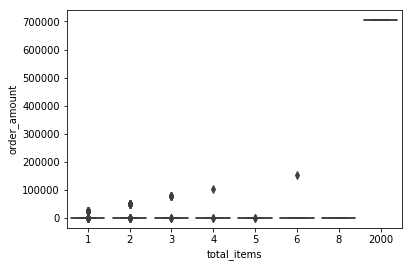

In [10]:
sns.boxplot(x=data['total_items'], y=data['order_amount'])

Through the boxplots, we notice that most of the data have outlier order amount values in relation to total items. We notice as well that the max value we saw before was generated through a purchase of 2000 items. Even more strange. We will examine the large outlier first before examining the rest.

In [19]:
large_outlier = data.loc[data['order_amount'] == 704000]

In [31]:
display(large_outlier)
print("Number of rows: ", large_outlier['order_id'].count())

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Number of rows:  17


Looking at the data with order_amounts 704000, we see some shocking infomation, all purchases were made at the same shop, by the same user, with the same number of items, at exactly 4:00 on different days and most concerning on credit card. Call the police! This seems like credit card theft mixed with a purchasing bot. Let's see if our user 607 has other purchases on his account. 

In [23]:
suspect = data.loc[data['user_id'] == 607]

display(suspect)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Seems not! Obviously this value should not be included in our mean calculation as it greatly skews our data. I will remove it from our data.

In [28]:
data = data[data['user_id'] != 607]

data.shape

(4983, 7)

In [32]:
data['order_amount'].describe()

count      4983.000000
mean        754.091913
std        5314.092293
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      154350.000000
Name: order_amount, dtype: float64

Our mean fell considerably from 3415 to 754. However, the standard deviation is still too large for my liking. We will remove outliers from the other boxplots we saw previously.

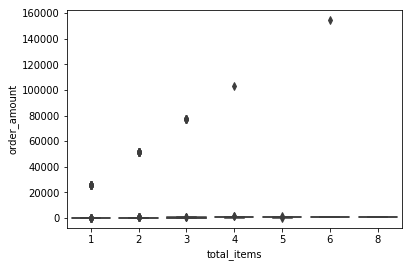

In [40]:
sns.boxplot(x=data['total_items'], y=data['order_amount'])

In [42]:
item1 = data.loc[data['total_items'] == 1]
item2 = data.loc[data['total_items'] == 2]
item3 = data.loc[data['total_items'] == 3]
item4 = data.loc[data['total_items'] == 4]
item5 = data.loc[data['total_items'] == 5]
item6 = data.loc[data['total_items'] == 6]
item8 = data.loc[data['total_items'] == 8]

In [43]:
def search_outlier(item_number):
    q1 = item_number['order_amount'].quantile(0.25)
    q3 = item_number['order_amount'].quantile(0.75)
    iqr = q3 - q1
    u_fence = q3 + (iqr*1.5)
    l_fence = q1 - (iqr*1.5)
    
    outliers = item_number[(item_number['order_amount'] < l_fence) |
                            (item_number['order_amount'] > u_fence)]
    
    return outliers

In [45]:
item1_outliers = search_outlier(item1)

display(item1_outliers)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
834,835,42,792,352,1,cash,2017-03-25 21:31:25
979,980,42,744,352,1,debit,2017-03-12 13:09:04
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43


In [46]:
item2_outliers = search_outlier(item2)

display(item2_outliers)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
835,836,42,819,704,2,cash,2017-03-09 14:15:15
1520,1521,42,756,704,2,debit,2017-03-22 13:10:31
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
1911,1912,42,739,704,2,cash,2017-03-07 5:42:52
2003,2004,42,934,704,2,cash,2017-03-26 9:21:26


In [47]:
item3_outliers = search_outlier(item3)

display(item3_outliers)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2987,2988,42,819,1056,3,cash,2017-03-03 9:09:25
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
3513,3514,42,726,1056,3,debit,2017-03-24 17:51:05
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32


In [48]:
item4_outliers = search_outlier(item4)

display(item4_outliers)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34


In [49]:
item6_outliers = search_outlier(item6)

display(item6_outliers)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43


Looking at the outliers from each block seperated by total_items bought in an order, I noticed another interesting pattern. Shop id 78 is selling shoes at very high prices, 25725$ to be exact. More often than not, that store is contributing to the immense standard deviation we saw before. Thus, it may be a good idea to check the legitimacy of the store as we wouldn't want people exchaning money over store sales. 

As for our analysis, this finding helps immensely, I will count shop id 78 as an outlier as well and remove all rows associated with it from our data. 

In [50]:
data = data[data['shop_id'] != 78]

data.shape

(4937, 7)

In [51]:
data['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

<h1>Conclusions</h1>
<br>
As I have seen throughout the data, there are certain shoes that sell for high prices and so the values in the table above are justifiable. The median shoe order is 284 and as such, a mean of 302.58 is not too far off. This was a pretty fun excercise, thank you for reading through my analysis and hopefully I can see you at an interview! 

<br>

<h3>Answers (summary)</h3>

a) Mean was calculated as sum of order_amount divided by number of rows. Does not account for outliers.

b) Clean our data and remove all outlier values. In this case it would be the user with id 607 as well as shop with id of 78. These two contributed significantly to the large std in our data.

c) Mean after cleaning is 302.58$